# Quantization #

Dieses Notebook zeigt den Einfluss verschiedener Quantisierungs- und Überlaufsoptionen auf Zeit- und Frequenzbereich.

- Limit Cycles: Unterschied zwischen Runden und Betragsschneiden
-

In [38]:
from __future__ import print_function, division
import os, sys
import time

module_path = os.path.abspath(os.path.join('..')) # append directory one level up to import path
if module_path not in sys.path:  # ... if it hasn't been appended already
    sys.path.append(module_path)

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline

import dsp_fpga_lib as dsp # import and set plot properties
import dsp_fpga_fix_lib as fx

import numpy as np
from numpy import sin, cos, tan, angle, pi, array, arange, log10, zeros, \
  linspace, ones, sqrt
from scipy.stats import norm
import scipy.signal as sig

plt.rcParams["figure.figsize"] = [15, 10]

In diesem Kapitel nutzen wir die Fixpointbibliothek `dsp_lib_fix.py`. Sie benötigen zunächst ein Dictionary (hier: `q_dict`), in dem das Format `QI.QF` am Ausgang des Quantisierers und sein Quantisierungs- und Überlaufverhalten definiert sind. 

Danach wird mit `Q1 = fx.Fixed(q_dict)` eine Instanz der Fixpointklasse `Fixed()` mit den definierten Quantisierungsoptionen instantiiert.

Geben Sie in einer Codezelle `?fx.Fixed()` ein, um alle Optionen zu sehen. Das folgende Beispiel zeigt das Prinzip:

In [46]:
q_dict = {'QI':0, 'QF': 3,                 # number of ingeger and fractional bits
          'quant':'floor', 'ovfl': 'wrap'} # quantization and overflow behaviour
Q1 = fx.Fixed(q_dict)                      # instance of fixpoint class Fixed()
for i in np.arange(12)/10:                 # i = 0, 0.1, 0.2, ...
    print("q< {0:>3.2f} > = {1:>5.3f}".format(i, Q1.fix(i))) # quantize i
?fx.Fixed() # show docstring / options of class Fixed()

q< 0.00 > = 0.000
q< 0.10 > = 0.000
q< 0.20 > = 0.125
q< 0.30 > = 0.250
q< 0.40 > = 0.375
q< 0.50 > = 0.500
q< 0.60 > = 0.500
q< 0.70 > = 0.625
q< 0.80 > = 0.750
q< 0.90 > = 0.875
q< 1.00 > = -1.000
q< 1.10 > = -1.000


Spielen Sie mit dem Skript herum, versuchen Sie den Code mit Hilfe der obigen Hinweise nachzuvollziehen und versuchen Sie folgende Fragen zu beantworten:

- Können Sie aus dem Plot erkennen, welche Art der Requantisierung und ob Sättigungslogik verwendet wurde?
- Welches *SQNR* erwarten Sie bei den Quantisierungsparametern im Skript?
- Warum ergibt die Simulation einen schlechteren Wert? Welchen maximalen Wert können Sie erreichen?
- Legen Sie ein Sinussignal mit der halben maximalen Amplitude an den Quantisierer. Welche Signalleistung erwarten Sie, welches *SQNR* und welche *ENOB*?
- Was passiert, wenn Sie den Quantisierer übersteuern? Vergleichen Sie die Optionen `'sat'` und `'wrap'`.
- Welchen Einfluss auf das Quantisierungsrauschen haben die Quantisierungsmethoden, also z.B. `'floor'`, `'round'` und `'fix'`? Schauen Sie sich dabei auch den DC-Wert des Spektrums an.
- Erklären Sie, welchen Einfluss die Anzahl der dargestellten Signalperioden $N\_per$ im Code auf das dargestellte Spektrum hat. 



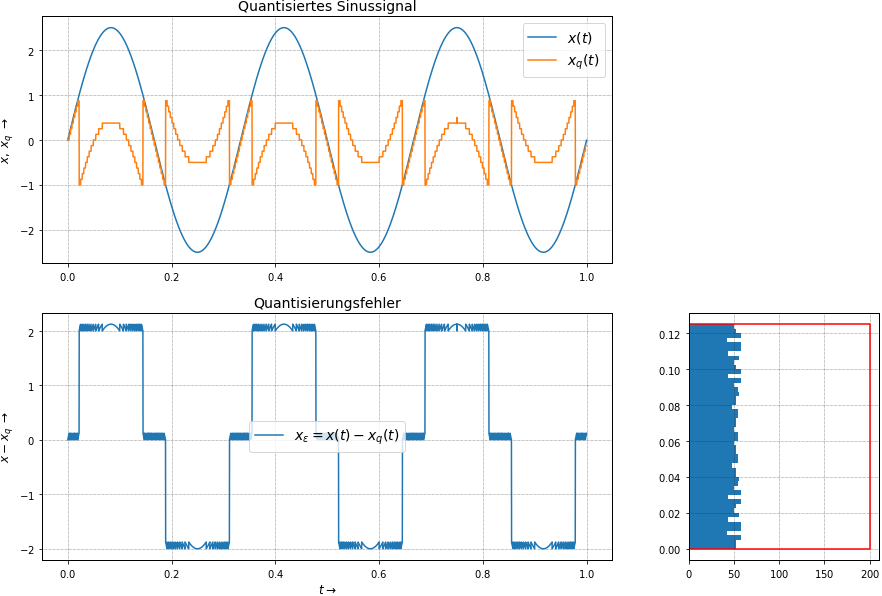

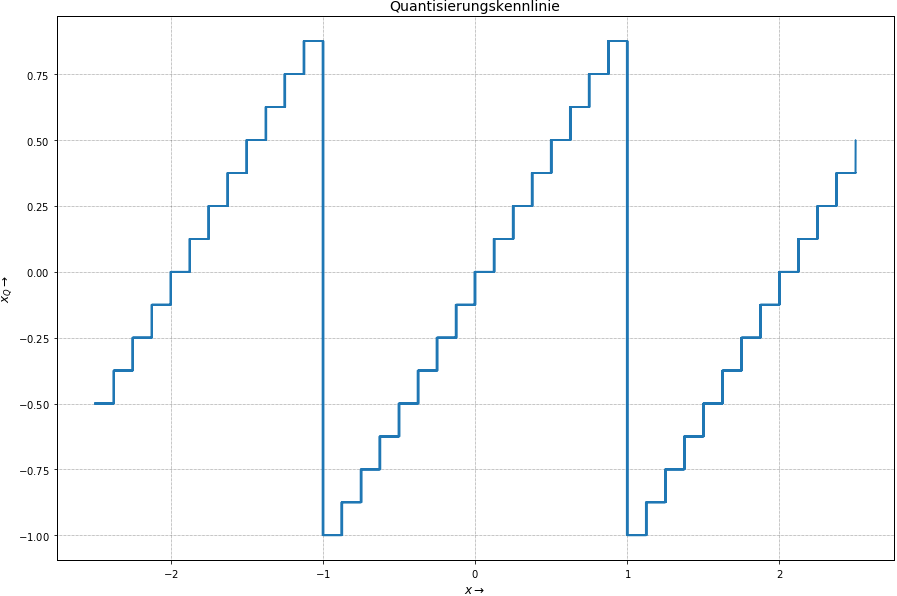

In [47]:
N = 10000
N_bins = 50
t = linspace(0, 1, N, endpoint=False)
x = sin(2*pi*t*3)*2.5
r = np.random.randn(N)

q_obj = {'QI':0, 'QF': 3, 'quant':'floor', 'ovfl': 'wrap'} # try 'round' ; 'sat'

fx_x = fx.Fixed(q_obj)

x_q = fx_x.fix(x) # quantize x
x_eps = x - x_q # quantization error
#
fig1 = plt.figure(1)
gs = gridspec.GridSpec(2, 2, width_ratios=[3, 1]) 
ax11 = plt.subplot(gs[0])
ax11.set_title('Quantisiertes Sinussignal')
ax11.plot(t, x, label = r'$x(t)$')
ax11.plot(t, x_q, label = r'$x_q(t)$')
ax11.legend(fontsize = 14)
#ax11.grid(True)
ax11.set_ylabel(r'$x, \;x_q \; \rightarrow$')
ax13 = plt.subplot(gs[2])
ax13.set_title('Quantisierungsfehler')
ax13.plot(t, x_eps, label = r'$x_{\epsilon} = x(t) - x_q(t)$')
ax13.set_ylabel(r'$x - x_q \; \rightarrow$')
ax13.legend(fontsize = 14)
ax13.set_xlabel(r'$t \rightarrow$');
ax14= plt.subplot(gs[3])
#ax14.plot(hist)
ax14.hist(x_eps, bins=N_bins, 
                       range=(0, Q1.LSB), 
                       density=False, 
                       weights=None, 
                       cumulative=False, 
                       bottom=None, 
                       histtype=u'bar', 
                       align=u'mid', 
                       orientation=u'horizontal', 
                       rwidth=None, 
                       log=False, 
                       color=None, 
                       label=None, 
                       stacked=False)
ax14.plot([0, N/50, N/50, 0],[0,0,fx_x.LSB,fx_x.LSB], 'r-')
#
fig2 = plt.figure(2)
ax21 = fig2.add_subplot(111)
ax21.set_title('Quantisierungskennlinie')
ax21.step(x,x_q, where = 'post')
ax21.set_xlabel(r'$x \rightarrow$')
ax21.set_ylabel(r'$x_Q \rightarrow$');
#plt.show()

<hr>
**Copyright**

(c) 2016 - 2018 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp_fpga "Digitale Signalverarbeitung auf FPGAs"

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing auf FPGAs - Vorlesungsunterlagen mit Simulationsbeispielen, 2018*.